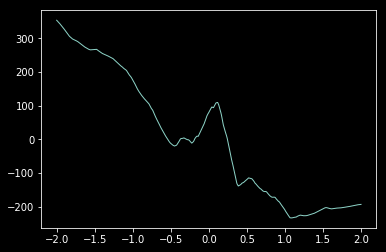

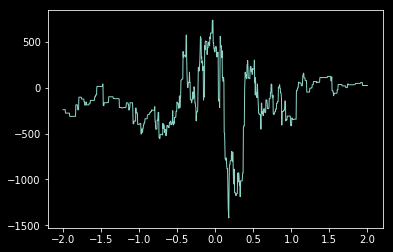

........With Sign Trick...........


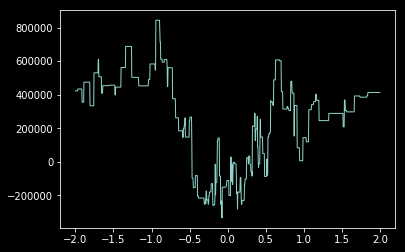

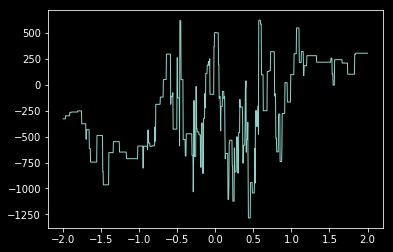

In [2]:
import math
import torch
from torch import nn
import matplotlib.pyplot as plt
import network_moments.torch.gaussian as gnm

plt.style.use('dark_background')

class MyNorm(nn.Module):
    def __init__(self, factor):
        super().__init__()
        self.factor = factor
    def forward(self, x):
#         m = x.mean(dim=0)
#         s = x.std(dim=0)
#         x = x - m
#         x = x / s
        if self.training:
            x = x + x.sign() * 1000
        return x
        

class Net(nn.Module):
    def __init__(self, num_layers, dim):
        super().__init__()
        num_layers += 1
        layers = []
        for i in range(1, num_layers + 1):
            input_dim = dim if i > 1 else 1
            output_dim = dim if i < num_layers else 1
            layer = nn.Linear(input_dim, output_dim)
            state = {
                'weight': torch.randn_like(layer.weight),
#                 'bias': torch.ones_like(layer.bias) * 2,
                'bias': layer.bias,
            }
            layer.load_state_dict(state)
            layers.append(layer)
            if i < num_layers:
                layers.append(MyNorm(i))
                layers.append(nn.ReLU())
#                 layers.append(nn.BatchNorm1d(output_dim))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

a = 2
net = Net(3, 200).eval().double()
with torch.no_grad():
    xs = torch.linspace(-a, a, 1000, dtype=torch.float64)
    ys = net(xs.view(-1, 1)).view(-1)
gs = gnm.utils.jacobian(net, xs.view(-1, 1)).view(-1)
plt.plot(xs.numpy(), ys.numpy(), label='ys', linewidth=1)
plt.show()
plt.plot(xs.numpy(), gs.numpy(), label='gs', linewidth=1)
plt.show()
print('........With Sign Trick...........')
net.train()
with torch.no_grad():
    ys = net(xs.view(-1, 1)).view(-1)
gs = gnm.utils.jacobian(net, xs.view(-1, 1)).view(-1)
plt.plot(xs.numpy(), ys.numpy(), label='ys', linewidth=1)
plt.show()
plt.plot(xs.numpy(), gs.numpy(), label='gs', linewidth=1)
plt.show()